In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
import requests

# Getting Data

url_request = requests.get("https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1/query?where=1%3D1&outFields=*&outSR=4326&f=json")
url_json = url_request.json()
df = pd.DataFrame(url_json['features'])

In [3]:
import datetime as dt

# a. transforming data

data_list = df['attributes'].tolist()
data = pd.DataFrame(data_list)
data.set_index('OBJECTID')
data = data[['Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Recovered','Deaths','Active']]
data.columns = ('State','Country','Last Update','Lat','Long','Confirmed','Recovered','Deaths','Active')
data['State'].fillna(value = '', inplace = True)
data

# b. cleaning data

def convert_time(t):
    t = int(t)
    return dt.datetime.fromtimestamp(t)

data = data.dropna(subset = ['Last Update'])
data['Last Update'] = data['Last Update']/1000
data['Last Update'] = data['Last Update'].apply(convert_time)
data

,State,Country,Last Update,Lat,Long,Confirmed,Recovered,Deaths,Active
0,,Afghanistan,2020-11-08 08:24:58,33.939110,67.709953,42092,34458,1558,6076
1,,Albania,2020-11-08 08:24:58,41.153300,20.168300,23705,12002,557,11146
2,,Algeria,2020-11-08 08:24:58,28.033900,1.659600,61381,41783,2036,17562
3,,Andorra,2020-11-08 08:24:58,42.506300,1.521800,5319,4043,75,1201
4,,Angola,2020-11-08 08:24:58,-11.202700,17.873900,12335,5647,303,6385
...,...,...,...,...,...,...,...,...,...
742,Ohio,US,2020-11-08 08:24:58,40.388783,-82.764915,245727,0,5506,240221
743,Alabama,US,2020-11-08 08:24:58,32.318200,-86.902300,202482,0,3082,199400
744,North Carolina,US,2020-11-08 08:24:58,35.630066,-79.806419,291245,0,4605,286640
745,District of Columbia,US,2020-11-08 08:24:58,38.897438,-77.026817,17891,0,654,17237


In [4]:
# a. Top 10 confirmed countries (Bubble plot)

top10_confirmed = pd.DataFrame(data.groupby('Country')['Confirmed'].sum().nlargest(10).sort_values(ascending = False))
fig1 = px.scatter(top10_confirmed, x = top10_confirmed.index, y = 'Confirmed', size = 'Confirmed', size_max = 120,
                color = top10_confirmed.index, title = 'Top 10 Confirmed Cases Countries')
fig1.show()

In [5]:
# b. Top 10 deaths countries (h-Bar plot)

top10_deaths = pd.DataFrame(data.groupby('Country')['Deaths'].sum().nlargest(10).sort_values(ascending = True))
fig2 = px.bar(top10_deaths, x = 'Deaths', y = top10_deaths.index, height = 600, color = 'Deaths', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'Top 10 Death Cases Countries')
fig2.show()

In [6]:
# c. Top 10 recovered countries (Bar plot)

top10_recovered = pd.DataFrame(data.groupby('Country')['Recovered'].sum().nlargest(10).sort_values(ascending = False))
fig3 = px.bar(top10_recovered, x = top10_recovered.index, y = 'Recovered', height = 600, color = 'Recovered',
             title = 'Top 10 Recovered Cases Countries', color_continuous_scale = px.colors.sequential.Viridis)
fig3.show()

In [7]:
# d. Top 10 active countries

top10_active = pd.DataFrame(data.groupby('Country')['Active'].sum().nlargest(10).sort_values(ascending = True))
fig4 = px.bar(top10_active, x = 'Active', y = top10_active.index, height = 600, color = 'Active', orientation = 'h',
             color_continuous_scale = ['paleturquoise','blue'], title = 'Top 10 Active Cases Countries')
fig4.show()

In [8]:
# USA
topstates_us = data['Country'] == 'US'
topstates_us = data[topstates_us].nlargest(5, 'Confirmed')
# Brazil
topstates_brazil = data['Country'] == 'Brazil'
topstates_brazil = data[topstates_brazil].nlargest(5, 'Confirmed')
# India
topstates_india = data['Country'] == 'India'
topstates_india = data[topstates_india].nlargest(5, 'Confirmed')
# Russia
topstates_russia = data['Country'] == 'Russia'
topstates_russia = data[topstates_russia].nlargest(5, 'Confirmed')

In [9]:
# USA 
fig5 = go.Figure(data = [
    go.Bar(name = 'Active Cases', x = topstates_us['Active'], y = topstates_us['State'], orientation = 'h'),
    go.Bar(name = 'Death Cases', x = topstates_us['Deaths'], y = topstates_us['State'], orientation = 'h')
])
fig5.update_layout(title = 'Most Affected States in USA', height = 600)
fig5.show()

In [10]:
# Brazil
fig6 = go.Figure(data = [
    go.Bar(name = 'Recovered Cases', x = topstates_brazil['State'], y = topstates_brazil['Recovered']),
    go.Bar(name = 'Active Cases', x = topstates_brazil['State'], y = topstates_brazil['Active']),
    go.Bar(name = 'Death Cases', x = topstates_brazil['State'], y = topstates_brazil['Deaths'])
])
fig6.update_layout(title = 'Most Affected States in Brazil', barmode = 'stack', height = 600)
fig6.show()

In [11]:
# India
fig7 = go.Figure(data = [
    go.Bar(name = 'Recovered Cases', x = topstates_india['State'], y = topstates_india['Recovered']),
    go.Bar(name = 'Active Cases', x = topstates_india['State'], y = topstates_india['Active']),
    go.Bar(name = 'Death Cases', x = topstates_india['State'], y = topstates_india['Deaths'])
])
fig7.update_layout(title = 'Most Affected States in India', barmode = 'stack', height = 600)
fig7.show()

In [12]:
# Russia
fig8 = go.Figure(data = [
    go.Bar(name = 'Recovered Cases', x = topstates_russia['State'], y = topstates_russia['Recovered']),
    go.Bar(name = 'Active Cases', x = topstates_russia['State'], y = topstates_russia['Active']),
    go.Bar(name = 'Death Cases', x = topstates_russia['State'], y = topstates_russia['Deaths'])
])
fig8.update_layout(title = 'Most Affected States in Russia', barmode = 'stack', height = 600)
fig8.show()

In [15]:
time_series = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')
time_series['Date_reported'] = pd.to_datetime(time_series['Date_reported'])

In [16]:
time_series_dates = time_series.groupby('Date_reported').sum()
time_series_dates

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,
2020-01-03,0,0,0,0
2020-01-04,1,1,0,0
2020-01-05,0,1,0,0
2020-01-06,3,4,0,0
2020-01-07,0,4,0,0
...,...,...,...,...
2020-11-03,441127,46942772,5582,1205104
2020-11-04,470763,47413535,7417,1212521
2020-11-05,545655,47959190,9653,1222174


In [17]:
# Cumulative cases

fig11 = go.Figure()
fig11.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates[' Cumulative_cases'], fill = 'tonexty',
                          line_color = 'blue'))
fig11.update_layout(title = 'Cumulative Cases Worldwide')
fig11.show()

In [18]:
# Cumulative death cases

fig12 = go.Figure()
fig12.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates[' Cumulative_deaths'], fill = 'tonexty',
                          line_color = 'red'))
fig12.update_layout(title = 'Cumulative Deaths Worldwide')
fig12.show()

In [19]:
# Daily new cases

fig13 = go.Figure()
fig13.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates[' New_cases'], fill = 'tonexty',
                          line_color = 'gold'))
fig13.update_layout(title = 'Daily New Cases Worldwide')
fig13.show()

In [20]:
# Daily death cases

fig14 = go.Figure()
fig14.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates[' New_deaths'], fill = 'tonexty',
                          line_color = 'hotpink'))
fig14.update_layout(title = 'Daily Death Cases Worldwide')
fig14.show()

In [21]:
# USA 
time_series_us = time_series[' Country'] == ('United States of America')
time_series_us = time_series[time_series_us]

# Brazil
time_series_brazil = time_series[' Country'] == ('Brazil')
time_series_brazil = time_series[time_series_brazil]

# India
time_series_india = time_series[' Country'] == ('India')
time_series_india = time_series[time_series_india]

# Russia
time_series_russia = time_series[' Country'] == ('Russia')
time_series_russia = time_series[time_series_russia]

# Peru
time_series_peru = time_series[' Country'] == ('Peru')
time_series_peru = time_series[time_series_peru]

In [22]:
# Cumulative cases

fig15 = go.Figure()

fig15.add_trace(go.Line(x = time_series_us['Date_reported'], y = time_series_us[' Cumulative_cases'], name = 'USA'))
fig15.add_trace(go.Line(x = time_series_brazil['Date_reported'], y = time_series_brazil[' Cumulative_cases'], name = 'Brazil'))
fig15.add_trace(go.Line(x = time_series_india['Date_reported'], y = time_series_india[' Cumulative_cases'], name = 'India'))
fig15.add_trace(go.Line(x = time_series_russia['Date_reported'], y = time_series_russia[' Cumulative_cases'], name = 'Russia'))
fig15.add_trace(go.Line(x = time_series_peru['Date_reported'], y = time_series_peru[' Cumulative_cases'], name = 'Peru'))

fig15.update_layout(title = 'Time Series of Most Affected countries"s Cumulative Cases')

fig15.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [23]:
# Cumulative death cases

fig16 = go.Figure()

fig16.add_trace(go.Line(x = time_series_us['Date_reported'], y = time_series_us[' Cumulative_deaths'], name = 'USA'))
fig16.add_trace(go.Line(x = time_series_brazil['Date_reported'], y = time_series_brazil[' Cumulative_deaths'], name = 'Brazil'))
fig16.add_trace(go.Line(x = time_series_india['Date_reported'], y = time_series_india[' Cumulative_deaths'], name = 'India'))
fig16.add_trace(go.Line(x = time_series_russia['Date_reported'], y = time_series_russia[' Cumulative_deaths'], name = 'Russia'))
fig16.add_trace(go.Line(x = time_series_peru['Date_reported'], y = time_series_peru[' Cumulative_deaths'], name = 'Peru'))

fig16.update_layout(title = 'Time Series of Most Affected countries"s Cumulative Death Cases')

fig16.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [24]:
# Daily new cases

fig17 = go.Figure()

fig17.add_trace(go.Line(x = time_series_us['Date_reported'], y = time_series_us[' New_cases'], name = 'USA'))
fig17.add_trace(go.Line(x = time_series_brazil['Date_reported'], y = time_series_brazil[' New_cases'], name = 'Brazil'))
fig17.add_trace(go.Line(x = time_series_india['Date_reported'], y = time_series_india[' New_cases'], name = 'India'))
fig17.add_trace(go.Line(x = time_series_russia['Date_reported'], y = time_series_russia[' New_cases'], name = 'Russia'))
fig17.add_trace(go.Line(x = time_series_peru['Date_reported'], y = time_series_peru[' New_cases'], name = 'Peru'))

fig17.update_layout(title = 'Time Series of Most Affected countries"s Daily New Cases')

fig17.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [25]:
# Daily death cases

fig18 = go.Figure()

fig18.add_trace(go.Line(x = time_series_us['Date_reported'], y = time_series_us[' New_deaths'], name = 'USA'))
fig18.add_trace(go.Line(x = time_series_brazil['Date_reported'], y = time_series_brazil[' New_deaths'], name = 'Brazil'))
fig18.add_trace(go.Line(x = time_series_india['Date_reported'], y = time_series_india[' New_deaths'], name = 'India'))
fig18.add_trace(go.Line(x = time_series_russia['Date_reported'], y = time_series_russia[' New_deaths'], name = 'Russia'))
fig18.add_trace(go.Line(x = time_series_peru['Date_reported'], y = time_series_peru[' New_deaths'], name = 'Peru'))

fig18.update_layout(title = 'Time Series of Most Affected countries"s Daily Death Cases')

fig18.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [32]:
who = pd.read_csv('https://raw.githubusercontent.com/Yasaman1997/COVID/main/Data/country_wise_latest.csv')

who_region = pd.DataFrame(who.groupby('WHO Region')['Confirmed'].sum())

labels = who_region.index
values = who_region['Confirmed']

fig9 = go.Figure(data=[go.Pie(labels = labels, values = values, pull=[0, 0, 0, 0, 0.2, 0])])

fig9.update_layout(title = 'WHO Region-Wise Case Distribution', width = 700, height = 400, 
                   margin = dict(t = 0, l = 0, r = 0, b = 0))

fig9.show()

In [33]:
case_dist = who

# US
dist_us = case_dist['Country/Region'] == 'US'
dist_us = case_dist[dist_us][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')

# Brazil
dist_brazil = case_dist['Country/Region'] == 'Brazil'
dist_brazil = case_dist[dist_brazil][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')

# India
dist_india = case_dist['Country/Region'] == 'India'
dist_india = case_dist[dist_india][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')

# Russia
dist_russia = case_dist['Country/Region'] == 'Russia'
dist_russia = case_dist[dist_russia][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



Text(0.5, 0.98, 'Case Classification of Most Affected Countries')

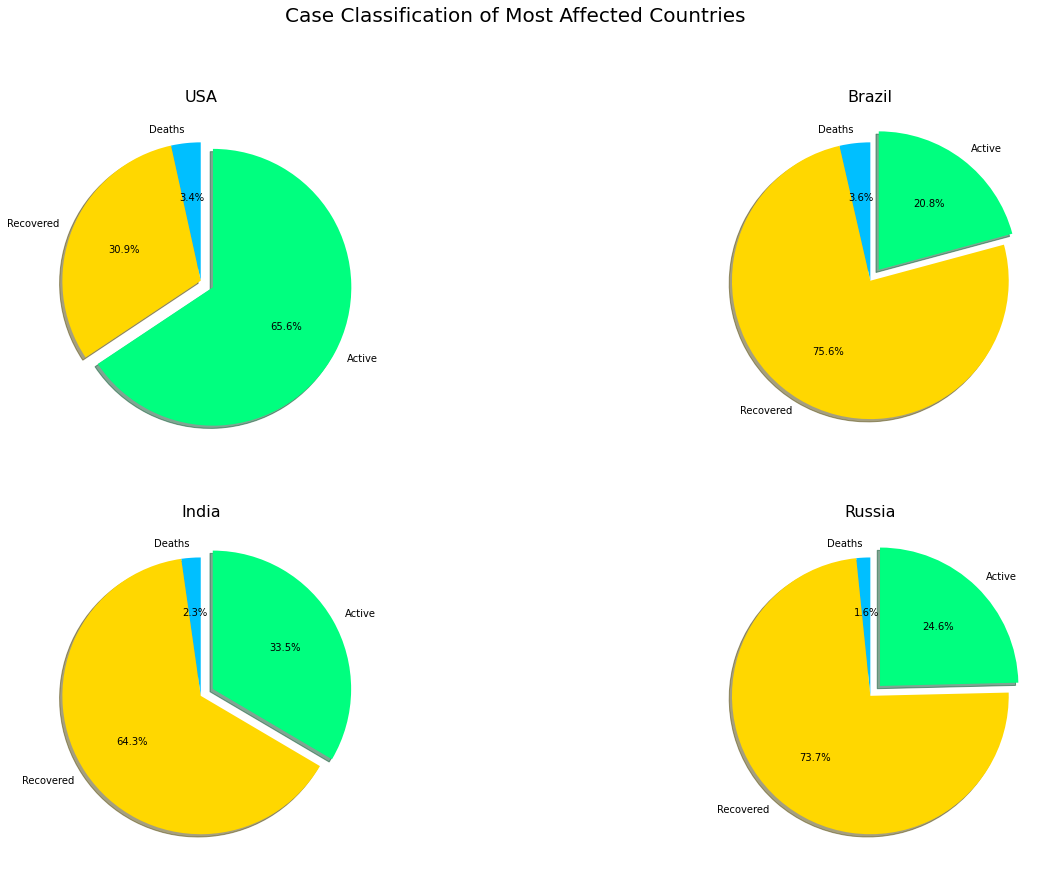

In [34]:
fig = plt.figure(figsize = (22,14))
colors_series = ['deepskyblue','gold','springgreen','coral']
explode = (0,0,0.1)

plt.subplot(221)
plt.pie(dist_us, labels = dist_us.columns, colors = colors_series, explode = explode,startangle = 90,
        autopct = '%.1f%%', shadow = True)
plt.title('USA', fontsize = 16)

plt.subplot(222)
plt.pie(dist_brazil, labels = dist_brazil.columns, colors = colors_series, explode = explode,startangle = 90,autopct = '%.1f%%',
       shadow = True)
plt.title('Brazil', fontsize = 16)

plt.subplot(223)
plt.pie(dist_india, labels = dist_india.columns, colors = colors_series, explode = explode, startangle = 90, autopct = '%.1f%%',
       shadow = True)
plt.title('India', fontsize = 16)

plt.subplot(224)
plt.pie(dist_russia, labels = dist_russia.columns, colors = colors_series, explode = explode, startangle = 90,
        autopct = '%.1f%%', shadow = True)
plt.title('Russia', fontsize = 16)

plt.suptitle('Case Classification of Most Affected Countries', fontsize = 20)

In [35]:
negative_positive = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
negative_positive = negative_positive.groupby('continent')[['total_cases','total_tests']].sum()

explode = (0,0.1)
labels = ['Postive','Negative']
colors = ['beige','paleturquoise']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



Text(0.5, 0.98, 'Continent-Wise Tested Positive & Negative Percentage Composition')

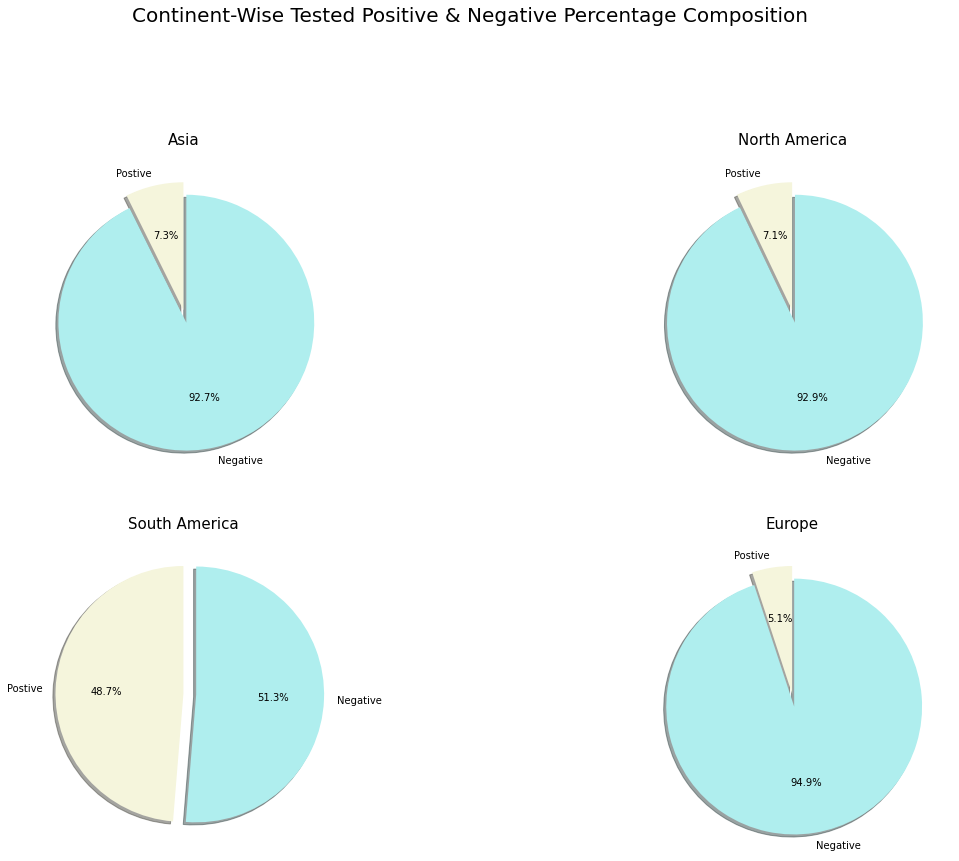

In [36]:
fig = plt.figure(figsize = (20,20))

plt.subplot(321)
plt.pie(negative_positive[negative_positive.index == 'Asia'],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('Asia', fontsize = 15)

plt.subplot(322)
plt.pie(negative_positive[negative_positive.index == 'North America'],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('North America', fontsize = 15)

plt.subplot(323)
plt.pie(negative_positive[negative_positive.index == 'South America'],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('South America', fontsize = 15)

plt.subplot(324)
plt.pie(negative_positive[negative_positive.index == 'Europe'],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('Europe', fontsize = 15)

plt.suptitle('Continent-Wise Tested Positive & Negative Percentage Composition', fontsize = 20)